## Boombikes Linear  Regression Assignment

In [25]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step 1: Reading and understaning the data

In [26]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [27]:
df.shape

(730, 16)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- We can drop few columns such as instant, dteday as they don't seem to be relevant
- atemp column can be dropped as well because we already have temp column which is sufficient
- casual and regitered can be eliminated as well since we already have the cnt as our target variable

In [29]:
# Analysing numeric variables

num_var=['temp','atemp','hum','windspeed','cnt']

In [30]:
df[num_var].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


<Figure size 864x576 with 0 Axes>

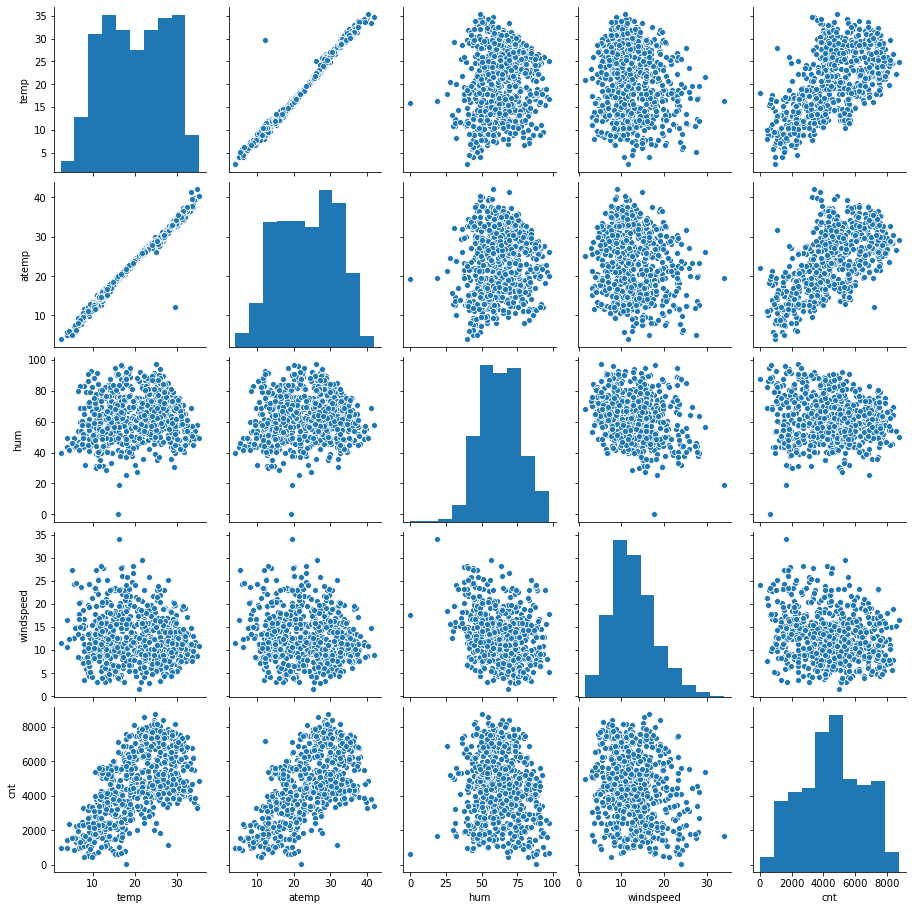

In [31]:
# visualising the correlation between numeric variables
plt.figure(figsize=(12,8))
sns.pairplot(df[num_var])
plt.show()

- As seen from above the variables temp and atemp are highly correlated
- Therefore we will drop one of them


In [32]:
# We will divide the categrical variable as given in problem definition

df['season']=df.season.apply(lambda x:{1:'spring', 2:'summer', 3:'fall', 4:'winter'}[x])
df['weathersit']=df.weathersit.apply(lambda x:{
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
		2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
		3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
		4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',
}[x])

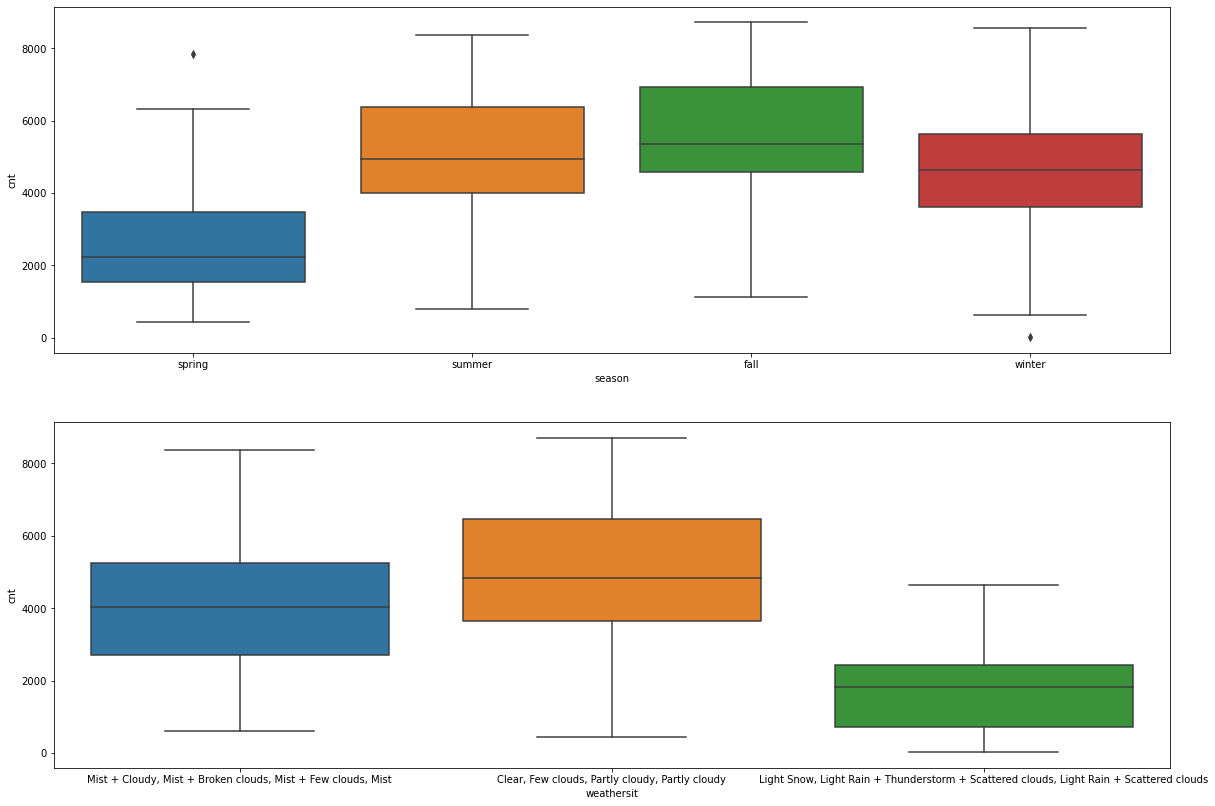

In [33]:
plt.figure(figsize=(20, 14))
plt.subplot(2,1,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,1,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

- From the first figure we observer that the season fall has the major cnt
- From the second fgure we see the cnt is more disributed when weather is Clear, Few clouds, Partly cloudy, Partly cloudy

In [34]:
# Dropping irrelevant columns

df=df.drop(["instant","dteday","atemp","casual","registered"],axis=1)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

- Some of the fields seem to be of categorical data type but are int/float
- Columns such as season, weathersit, yr,mnth can be converted to categorical data to create dummy variables

In [35]:
# Dummy variables

print(df.season.value_counts())

print(df.yr.value_counts())

print(df.mnth.value_counts())

print(df.weathersit.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64


In [36]:
# Converting these to categorical variable

df['season']=df['season'].astype('category')

df['yr']=df['yr'].astype('category')

df['mnth']=df['mnth'].astype('category')

df['weathersit']=df['weathersit'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 43.7 KB


### Data Prepartion

In [37]:
# Creating Dummy variables

season_dummy=pd.get_dummies(df['season'],drop_first=True)
weathersit_dummy=pd.get_dummies(df['weathersit'],drop_first=True)

df=pd.concat([df,season_dummy,weathersit_dummy],axis=1)

# removing redundant information
df=df.drop(columns=['season','weathersit'])

In [38]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1,0,1,1,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [39]:
# SPlitting the data

dftrain,dftest=train_test_split(df,train_size=0.7,random_state=100)
print(dftrain.shape)
print(dftest.shape)

(510, 14)
(220, 14)


### Training the Model

In [40]:
ytrain = df.pop('cnt')
xtrain = df

#add constant 
xtrain_sm=sm.add_constant(xtrain)

#create first model
#lr=sm.OLS(ytrain,xtrain_sm)

lr=sm.OLS(ytrain, xtrain_sm.astype(float)).fit()


#fit the model
#lr_model=lr.fit()


lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.82e-260
Time:                        14:09:54   Log-Likelihood:                -5924.8
No. Observations:                 730   AIC:                         1.188e+04
Df Residuals:                     716   BIC:                         1.194e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    2630.6653    306.996      8.569      0.000    2027.945    3233.385
yr                                                                                       2019.9381     61.495     32.847      0.000    1899.206    2140.670
mnth                                                                                      -15.7952     16.274     -0.971      0.332     -47.746      16.156
holiday                                                                                  -828.4000    188.075     -4.405      0.000   -1197.644    -459.156
weekday                                                                                    19.0085     15.214      1.249      0.212     -10.861      48.878
workingday                                                                               -182.7397     68.386     -2.672      0.008    -317.001     -48.478
temp                                                                                      124.4751      7.451     16.706      0.000     109.847     139.103
hum                                                                                       -12.0289      2.966     -4.055      0.000     -17.853      -6.205
windspeed                                                                                 -41.4273      6.359     -6.515      0.000     -53.912     -28.943
spring                                                                                   -903.5517    165.941     -5.445      0.000   -1229.342    -577.762
summer                                                                                    250.5916    109.799      2.282      0.023      35.026     466.158
winter                                                                                    750.6807    131.197      5.722      0.000     493.104    1008.258
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1934.2005    206.578     -9.363      0.000   -2339.772   -1528.629
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -444.3833     81.253     -5.469      0.000    -603.906    -284.861
==============================================================================
Omnibus:                       92.623   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.038
Skew:                          -0.708   Prob(JB):                     4.05e-46
Kurtosis:                       5.206   Cond. No.                         779.
====================================

- R-suared adjusted r-square are quite good
- Prob of f-statistic is 2.82e-260 which indicates it is different
- There are some multicollinearity as well

In [41]:
#we will use RFE to chose the best 12 feature for our regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(xtrain,ytrain)
rfe=RFE(lm,12)
rfe=rfe.fit(xtrain,ytrain)
list(zip(xtrain.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', True, 1)]

### VIF

In [42]:
def printVif(x):
  vif=pd.DataFrame()
  vif['features']=x.columns
  vif['vif']=[round(variance_inflation_factor(x.values,i),2) for i in range(x.shape[1])]
  #np.array(x, dtype=float)
  vif=vif.sort_values(by='vif',ascending=False)
  print(vif)

In [43]:
# selecting the top 12 column as per RFE
xtrain=xtrain[['yr','mnth','holiday','weekday','workingday','temp','windspeed','spring','summer','winter','Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds','Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist']]
#add constant 
xtrain_sm=sm.add_constant(xtrain)

#create first model
#lr=sm.OLS(ytrain,xtrain_sm)


lr=sm.OLS(ytrain, xtrain_sm.astype(float)).fit()

#fit the model
#lr_model=lr.fit()


print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     273.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.52e-258
Time:                        14:09:54   Log-Likelihood:                -5933.0
No. Observations:                 730   AIC:                         1.189e+04
Df Residuals:                     717   BIC:                         1.195e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

- Some variables like mnth, holiday, workingday and summer have p-value greater than equal to 5 and
variables like mnth, temp and windspeed have VIF greater than 5.
- R-squared is around 81% which indicates this is a good model


### Residual Analysis

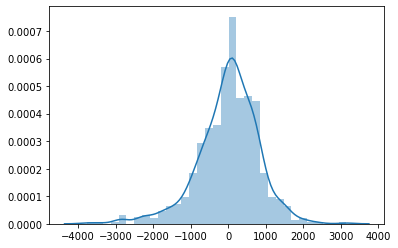

In [44]:
ytrain_pred=lr.predict(xtrain_sm)
res=ytrain-ytrain_pred
sns.distplot(res)

- As we can see the residual has a mean of zero and it is normally distributed

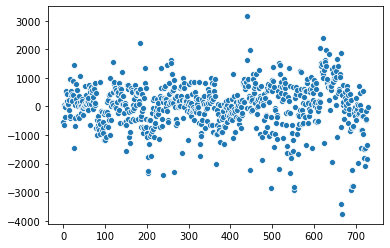

In [45]:
sns.scatterplot(data=res)

- As we can see it is randomly disributed, error terms are independent 

### Making Pediction and Model evaluation

In [46]:
ytest= dftest.pop('cnt')

# match variables as per the model
xtest= dftest[xtrain.columns]

# add constant
xtest_sm=sm.add_constant(xtest)

# predict
ytest_pred=lr.predict(xtest_sm)

In [47]:
# evaluate the model
res=r2_score(ytest,ytest_pred)
round(res*100,2)

81.48

- The models r^2 with training data and testing data does not have significant difference (approximately 81%) which is why it can be safely assumed that the model which is generated is highly accurate and a good fit.

Some inferences

Holiday is negatively correlated so most of the registered users might be using bikes to commute to work
Also if the temperature is higher the users are more likely to register for bike-sharing
Over the years the trend of bike-sharing has increased.
There are more people registering for bike-sharinT in winter and summer season